In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Intro

We will use data from Kaggle to try predict the house sales in King County, USA(Seattle) using feature engineering and Tensorflow Neural Network

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Data Loading and Exploratory Data Analysis

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#checking if there is any missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
#id doesn't tell anything but mean price can be important
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


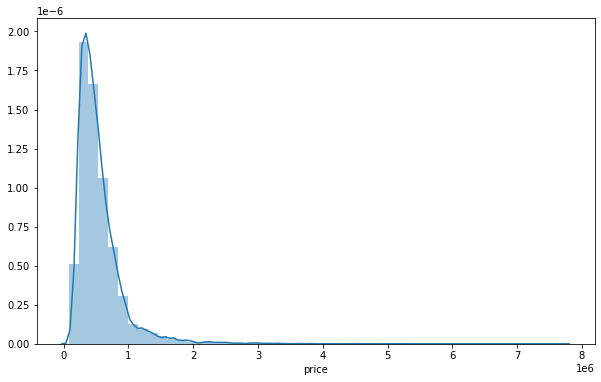

In [6]:
#Start from distplot to explore data
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

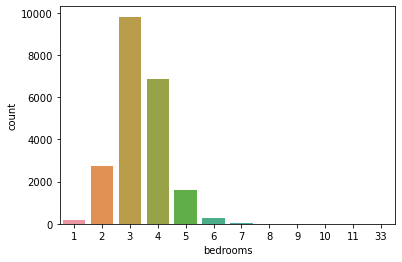

In [7]:
#Let's see the trend in number how many bedrooms houses have
sns.countplot(df['bedrooms'])

Similar distribution from the price, majority houses have 2~5 bedrooms, and it looks like there is a outlier in bedrooms column(33)

In [8]:
#check out the correlation by price
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

We will begin exploring highly correlated features by visualization

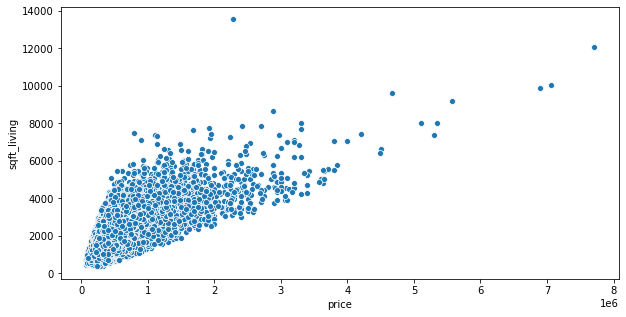

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

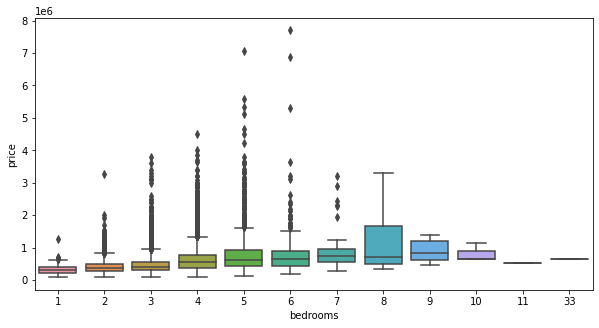

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y='price',data=df)

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

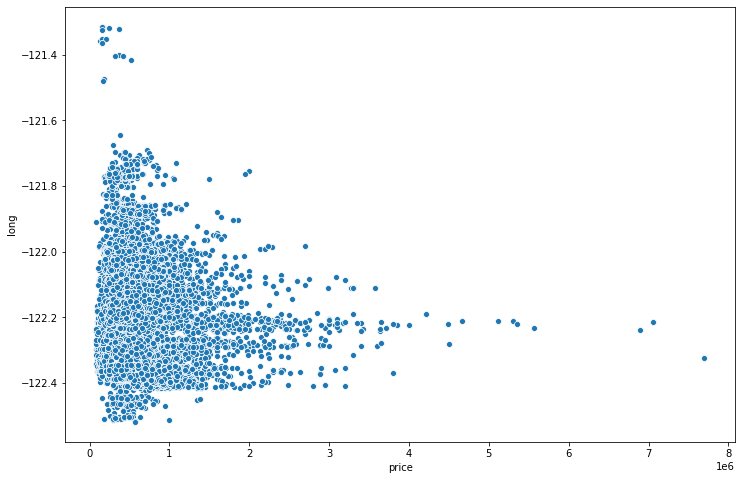

In [12]:
#see distribution of prices by latitude and longitude
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

There tends to be some sort of price distribution by some longtitude because there is change in price by some longitude.

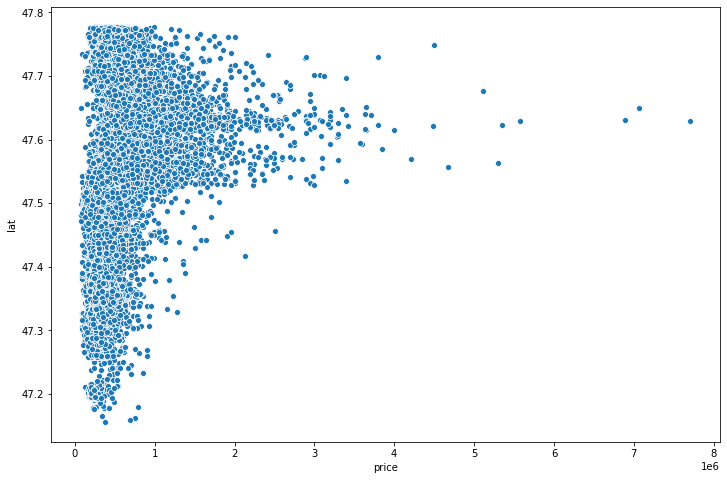

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

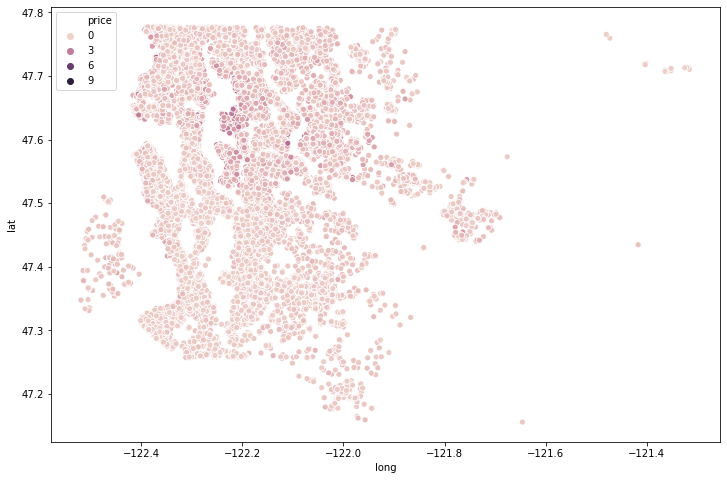

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

By using the plot above, we can see the shape of king county and see there is some expensive housing area by darker area. But it is not clear because of really expensive houses. So, we can try remove overwhelmingly expensive houses.

In [15]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)*0.01

215.97

In [17]:
#Let's take top 1 percent out
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

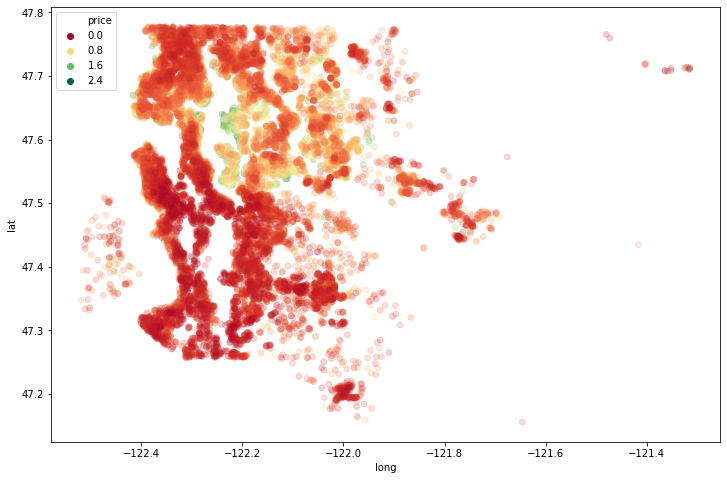

In [18]:
#Let's go ahead and check the plot again
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc,
                edgecolor=None, alpha=0.2, palette='RdYlGn', hue='price')

Now, color distribution is more clear. We can see the area near the water is expensive area which is normally true. 

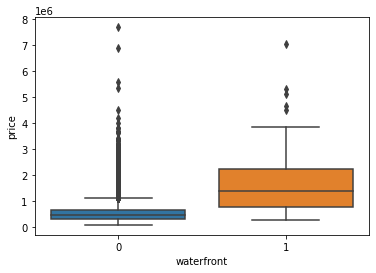

In [19]:
sns.boxplot(x='waterfront', y='price', data=df)

We can check this out by the plot above. It is definately expensive if the house is at waterfront.

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Feature Engineering

We want to drop id column since its not telling us any information

In [21]:
df = df.drop('id',axis=1)

In [22]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

We can change date column to datetime to use for feature engineering

In [23]:
df['date']=pd.to_datetime(df['date'])

In [24]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)


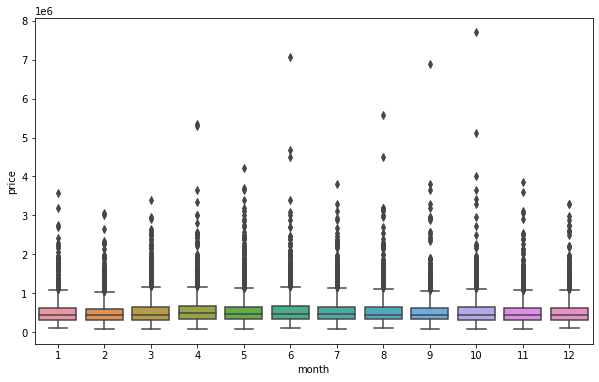

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

It is hard to tell there is distribution change in month for price. Let's check the monthly average price

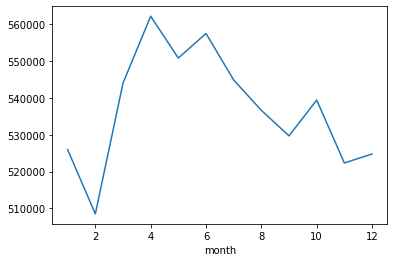

In [26]:
df.groupby('month').mean()['price'].plot()

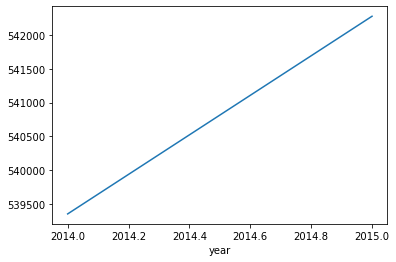

In [27]:
df.groupby('year').mean()['price'].plot()

In [28]:
#We are not using date column anymore
df = df.drop('date',axis=1)

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [30]:
#Let's check out the zipcode column
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

70 zipcode is too much for creating dummy variables and using. Maybe we can use domain knowledge to use the zipcode but we do not have information now so we will drop the column.

In [31]:
df = df.drop('zipcode',axis=1)

In [32]:
#check out year renovated
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Most of them are not renovated. and 0 is not actually a year. So can be either make this column to renovated or not renovated or use it as it is since lately renovated house can have higher price.

In [33]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

Same to basement. 0 means there is no basement, and bigger the basement is, higher can be the price. So leave it as it is.

## Data Preprocessing and Create a Model

In [34]:
#Let's divide feature to target first using .values for TF
X = df.drop('price',axis=1).values
y = df['price'].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
#Now we get train and test set. So now we need to scale them by Minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
X_train.shape

(15117, 19)

In [43]:
#Now we create the deep learning model. Since there are 19 features, it is good idea to have 19 neurons
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1)) #outputing price

model.compile(optimizer='adam',loss='mse')

In [44]:
#fitting the model with X_train, y_train and validation data of test data and batch size to prevent overfit
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test,y_test),
         batch_size=128,
         epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430238334976.0000 - val_loss: 418906996736.0000
Epoch 2/400
119/119 [==============================] - 0s 840us/step - loss: 429068713984.0000 - val_loss: 414827511808.0000
Epoch 3/400
119/119 [==============================] - 0s 857us/step - loss: 412236677120.0000 - val_loss: 375605362688.0000
Epoch 4/400
119/119 [==============================] - 0s 832us/step - loss: 327846821888.0000 - val_loss: 240982704128.0000
Epoch 5/400
119/119 [==============================] - 0s 840us/step - loss: 170573086720.0000 - val_loss: 107778801664.0000
Epoch 6/400
119/119 [==============================] - 0s 824us/step - loss: 101072691200.0000 - val_loss: 94562656256.0000
Epoch 7/400
119/119 [==============================] - 0s 832us/step - loss: 96889561088.0000 - val_loss: 93005996032.0000
Epoch 8/400
119/119 [==============================] - 0s 832us/step - loss: 95203934208.0000 - val_loss: 91391500288.0000
Epoch 9

119/119 [==============================] - 0s 824us/step - loss: 37755338752.0000 - val_loss: 36487176192.0000
Epoch 68/400
119/119 [==============================] - 0s 840us/step - loss: 37556658176.0000 - val_loss: 36285255680.0000
Epoch 69/400
119/119 [==============================] - 0s 866us/step - loss: 37390479360.0000 - val_loss: 36094787584.0000
Epoch 70/400
119/119 [==============================] - 0s 866us/step - loss: 37201846272.0000 - val_loss: 35941134336.0000
Epoch 71/400
119/119 [==============================] - 0s 840us/step - loss: 37041180672.0000 - val_loss: 35880919040.0000
Epoch 72/400
119/119 [==============================] - 0s 824us/step - loss: 36921831424.0000 - val_loss: 35654942720.0000
Epoch 73/400
119/119 [==============================] - 0s 824us/step - loss: 36793778176.0000 - val_loss: 35504041984.0000
Epoch 74/400
119/119 [==============================] - 0s 824us/step - loss: 36670775296.0000 - val_loss: 35432894464.0000
Epoch 75/400
119/119 

Epoch 133/400
119/119 [==============================] - 0s 815us/step - loss: 33041776640.0000 - val_loss: 31606030336.0000
Epoch 134/400
119/119 [==============================] - 0s 815us/step - loss: 32956696576.0000 - val_loss: 31679334400.0000
Epoch 135/400
119/119 [==============================] - 0s 815us/step - loss: 32938354688.0000 - val_loss: 31538374656.0000
Epoch 136/400
119/119 [==============================] - 0s 815us/step - loss: 32903532544.0000 - val_loss: 31499810816.0000
Epoch 137/400
119/119 [==============================] - 0s 815us/step - loss: 32853207040.0000 - val_loss: 31637088256.0000
Epoch 138/400
119/119 [==============================] - 0s 815us/step - loss: 32886607872.0000 - val_loss: 31434788864.0000
Epoch 139/400
119/119 [==============================] - 0s 815us/step - loss: 32796157952.0000 - val_loss: 31473014784.0000
Epoch 140/400
119/119 [==============================] - 0s 815us/step - loss: 32796960768.0000 - val_loss: 31355580416.0000


119/119 [==============================] - 0s 824us/step - loss: 31432007680.0000 - val_loss: 29970905088.0000
Epoch 199/400
119/119 [==============================] - 0s 832us/step - loss: 31445043200.0000 - val_loss: 29745778688.0000
Epoch 200/400
119/119 [==============================] - 0s 832us/step - loss: 31395895296.0000 - val_loss: 29722785792.0000
Epoch 201/400
119/119 [==============================] - 0s 840us/step - loss: 31374110720.0000 - val_loss: 29739268096.0000
Epoch 202/400
119/119 [==============================] - 0s 815us/step - loss: 31346995200.0000 - val_loss: 29734461440.0000
Epoch 203/400
119/119 [==============================] - 0s 891us/step - loss: 31365339136.0000 - val_loss: 29649772544.0000
Epoch 204/400
119/119 [==============================] - 0s 840us/step - loss: 31318466560.0000 - val_loss: 29631158272.0000
Epoch 205/400
119/119 [==============================] - 0s 849us/step - loss: 31314249728.0000 - val_loss: 29697318912.0000
Epoch 206/400


119/119 [==============================] - 0s 832us/step - loss: 30537764864.0000 - val_loss: 28650651648.0000
Epoch 264/400
119/119 [==============================] - 0s 815us/step - loss: 30505410560.0000 - val_loss: 28666595328.0000
Epoch 265/400
119/119 [==============================] - 0s 815us/step - loss: 30528249856.0000 - val_loss: 28580280320.0000
Epoch 266/400
119/119 [==============================] - 0s 815us/step - loss: 30492739584.0000 - val_loss: 28635316224.0000
Epoch 267/400
119/119 [==============================] - 0s 807us/step - loss: 30523125760.0000 - val_loss: 28561393664.0000
Epoch 268/400
119/119 [==============================] - 0s 815us/step - loss: 30486654976.0000 - val_loss: 28544876544.0000
Epoch 269/400
119/119 [==============================] - 0s 807us/step - loss: 30489712640.0000 - val_loss: 28559833088.0000
Epoch 270/400
119/119 [==============================] - 0s 824us/step - loss: 30435059712.0000 - val_loss: 28734361600.0000
Epoch 271/400


119/119 [==============================] - 0s 815us/step - loss: 29871638528.0000 - val_loss: 27729895424.0000
Epoch 329/400
119/119 [==============================] - 0s 840us/step - loss: 29900210176.0000 - val_loss: 27740682240.0000
Epoch 330/400
119/119 [==============================] - 0s 824us/step - loss: 29842511872.0000 - val_loss: 27790663680.0000
Epoch 331/400
119/119 [==============================] - 0s 824us/step - loss: 29900130304.0000 - val_loss: 27710580736.0000
Epoch 332/400
119/119 [==============================] - 0s 832us/step - loss: 29810786304.0000 - val_loss: 27866310656.0000
Epoch 333/400
119/119 [==============================] - 0s 824us/step - loss: 29868046336.0000 - val_loss: 27690772480.0000
Epoch 334/400
119/119 [==============================] - 0s 832us/step - loss: 29816762368.0000 - val_loss: 27764373504.0000
Epoch 335/400
119/119 [==============================] - 0s 874us/step - loss: 29813182464.0000 - val_loss: 27714895872.0000
Epoch 336/400


119/119 [==============================] - 0s 832us/step - loss: 29279700992.0000 - val_loss: 26955681792.0000
Epoch 394/400
119/119 [==============================] - 0s 840us/step - loss: 29216720896.0000 - val_loss: 26852972544.0000
Epoch 395/400
119/119 [==============================] - 0s 832us/step - loss: 29209681920.0000 - val_loss: 26829436928.0000
Epoch 396/400
119/119 [==============================] - 0s 824us/step - loss: 29182818304.0000 - val_loss: 26796171264.0000
Epoch 397/400
119/119 [==============================] - 0s 866us/step - loss: 29212692480.0000 - val_loss: 26826065920.0000
Epoch 398/400
119/119 [==============================] - 0s 874us/step - loss: 29176723456.0000 - val_loss: 26792390656.0000
Epoch 399/400
119/119 [==============================] - 0s 824us/step - loss: 29194029056.0000 - val_loss: 26793574400.0000
Epoch 400/400
119/119 [==============================] - 0s 840us/step - loss: 29157142528.0000 - val_loss: 26750046208.0000


In [45]:
#loss and loss on test set(validation data)
losses = pd.DataFrame(model.history.history)

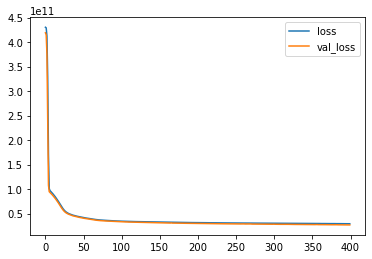

In [46]:
losses.plot()

There is no overfitting from the graph. validation loss is following the train loss without spike

## Evaluation of test data

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score

In [48]:
predictions = model.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test,predictions))

163554.4221020715

In [50]:
mean_absolute_error(y_test,predictions)

101169.774277826

In [51]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Average price of the house is 5.4*10^5 and we can see that mean absolute error is about 20% of the average price. It's not that bad but not that good. Let's check the explained variance score

In [52]:
explained_variance_score(y_test, predictions)

0.7983699704410453

We got explained variance score of 0.80. It's not that bad. If we keep training and keep removing errors, we can improve this.

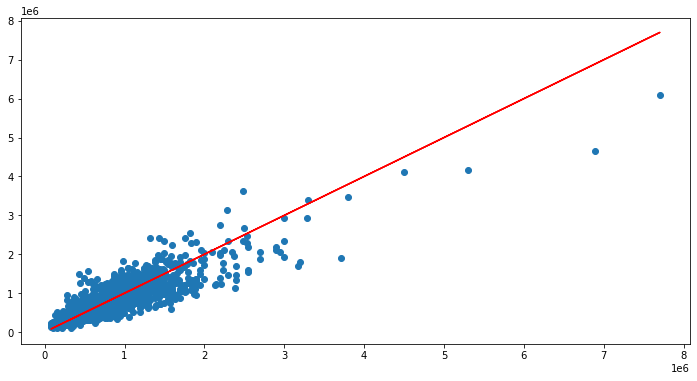

In [53]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

Red line represent the perfect prediction line. From the line and scatter plot, we can see that we are predicting good on price between 0 and 2000000. We can refit the model by bottom 99% again to improve the model.

## Test the model 
Let's say there is a new house coming out to market. We can test the performance of the model with first house information in dataframe.

In [54]:
single_house=df.drop('price',axis=1).iloc[0]

In [55]:
#We need to reshape and scale the features
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [56]:
model.predict(single_house)

array([[288552.25]], dtype=float32)

In [57]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


## Conclusion
Our prediction on the first house is overshoot by around 60000 dollars. We can make this error smaller by taking extreme values out from the dataset. But let's keep that in future steps and finish our model here. In this project, we perform the EDA, feature engineering, Scaling, and model fitting. And we get the model with 80% of variance.